In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.dates as dates

plt.style.use("cms")
# %matplotlib inline

In [3]:
data16 = pd.read_csv("lumi2016.csv", comment="#", parse_dates=[2], date_parser=pd.to_datetime)
data16.columns = ['runfill', 'ls', 'time', 'beamstatus', 'energy', 'delivered', 'recorded', 'avgpu', 'source']
#data16

In [4]:
data17 = pd.read_csv("lumi2017.csv", comment="#", parse_dates=[2], date_parser=pd.to_datetime)
data17.columns = ['runfill', 'ls', 'time', 'beamstatus', 'energy', 'delivered', 'recorded', 'avgpu', 'source']
#data17

In [5]:
data18 = pd.read_csv("lumi2018.csv", comment="#", parse_dates=[2], date_parser=pd.to_datetime)
data18.columns = ['runfill', 'ls', 'time', 'beamstatus', 'energy', 'delivered', 'recorded', 'avgpu', 'source']
#data18

In [6]:
toPlot16 = data16.set_index("time")["recorded"].cumsum()
toPlot17 = data17.set_index("time")["recorded"].cumsum()
toPlot18 = data18.set_index("time")["recorded"].cumsum()

toPlot17.index = toPlot17.index - pd.DateOffset(years=1)
toPlot18.index = toPlot18.index - pd.DateOffset(years=2)

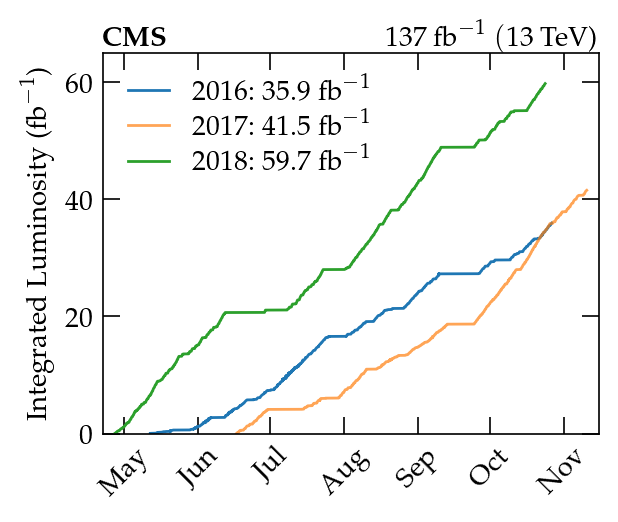

In [19]:
fig, ax = plt.subplots(figsize=(3.2, 2.8), dpi=200)

#ax.axhline(0., color='black', ls='--')
toPlot16.plot(ax=ax)
toPlot17.plot(ax=ax, alpha=0.7)
toPlot18.plot(ax=ax)

ax.xaxis.set_major_locator(dates.MonthLocator())
ax.xaxis.set_major_formatter(dates.DateFormatter("%b"))
ax.minorticks_off()
plt.setp(ax.get_xticklabels(), rotation=45, ha='center')

ax.set_xlim(
    toPlot18.index.min() - pd.DateOffset(days=5),
    toPlot17.index.max() + pd.DateOffset(days=5),
    #pd.Timestamp('2016-04-01'),
    #pd.Timestamp('2016-12-01'),
)
ax.set_ylim(0., 65.,)

ax.legend([
    r"2016: 35.9 $\mathrm{fb}^{-1}$", 
    r"2017: 41.5 $\mathrm{fb}^{-1}$", 
    r"2018: 59.7 $\mathrm{fb}^{-1}$"], 
    loc=2, labelspacing=0.2, frameon=False
)

ax.text(
    0, 1, r'$\textbf{CMS}$',
    ha='left', va='bottom',
    transform=ax.transAxes,
)
ax.text(
    1, 1, r'$137\ \mathrm{fb}^{-1}$ $(13\ \mathrm{TeV}$)',
    ha='right', va='bottom',
    transform=ax.transAxes,
)

ax.set_xlabel("")
ax.set_ylabel(r'Integrated Luminosity ($\mathrm{fb}^{-1}$)')

plt.savefig("plots/lumiPlot.pdf")
plt.savefig("plots/lumiPlot.png")

pass